# Algoritmo de ordenamiento binario - BinarySort
![Descripción de la imagen](orden-2.png)


##### En el ámbito de la informática y las ciencias de la computación, la eficiencia algorítmica es un aspecto crucial que determina el rendimiento de sistemas y aplicaciones. Los algoritmos de ordenación tradicionales, como Quicksort y Mergesort, han establecido un estándar en la industria, con eficiencias promedio de O(n log n). Sin embargo, con el crecimiento de los volúmenes de datos y la creciente demanda de procesamiento en tiempo real, surge la necesidad de explorar nuevos paradigmas que puedan reducir aún más la complejidad temporal de los algoritmos de ordenación.Este estudio está motivado por la posibilidad de desarrollar un algoritmo de ordenación que logre una eficiencia aún mayor, con un objetivo ambicioso de alcanzar una complejidad temporal de O(n). 


##### Para las pruebas, he utilizado los siguientes parámetros
- Tamaño de la lista a ordenar: Varía de 1 a 10 millones.
- Rango de valores: La lista contiene números aleatorios en el rango de 0 a 
𝑁
N, donde 
𝑁
N puede tomar valores de [10k, 50k, 100k, 200k]
- Distribución estadística de los números en la lista: Normal, bimodal, uniforme, sesgada a la izquierda, sesgada a la derecha y con muchos ceros.



##### Se realizará una permutación entre todos los parámetros, y cada prueba se llevará a cabo utilizando los algoritmos QuickSort, MergeSort y BinarySort. Los resultados se graficarán y se presentarán las conclusiones correspondientes.

## Importamos las bibliotecas

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Cargamos la data ya ordenada

In [47]:
filename = 'data.csv'
df = pd.read_csv(filename)

In [48]:
df.head()

,method,size,range,distribution,ordered,time
0,quickSort,1000000,10000,uniform,True,1.539276
1,mergeSort,1000000,10000,uniform,True,2.115735
2,binarySort,1000000,10000,uniform,True,1.030605
3,quickSort,2000000,10000,uniform,True,3.712282
4,mergeSort,2000000,10000,uniform,True,4.795651


In [49]:
df["ratio"] = ((df["size"] / 100000) / df["time"])
df

,method,size,range,distribution,ordered,time,ratio
0,quickSort,1000000,10000,uniform,True,1.539276,6.496562
1,mergeSort,1000000,10000,uniform,True,2.115735,4.726490
2,binarySort,1000000,10000,uniform,True,1.030605,9.703036
3,quickSort,2000000,10000,uniform,True,3.712282,5.387521
4,mergeSort,2000000,10000,uniform,True,4.795651,4.170445
...,...,...,...,...,...,...,...
715,mergeSort,9000000,200000,left_skewed,True,19.521670,4.610261
716,binarySort,9000000,200000,left_skewed,True,4.322062,20.823393
717,quickSort,10000000,200000,left_skewed,True,1.525422,65.555626
718,mergeSort,10000000,200000,left_skewed,True,21.719974,4.604057


### Verificamos que todas las pruebas hayan sido exitosas

In [50]:
count_true = df['ordered'].value_counts()[True]
if count_true == df.shape[0]:
    print("todos se ordenaron")
else:
    print("no se ordenaron todos")

todos se ordenaron


### Cargamos constantes necesarias y funciones

In [51]:
def format_number(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M' 
    elif x >= 1e3:
        return f'{x/1e3:.0f}k'  
    else:
        return str(int(x)) 
colors = ['dodgerblue', 'green', 'orange']
color_map = {
    'binarySort': 'dodgerblue',
    'mergeSort': 'green',
    'quickSort': 'orange',
}
distributions = ['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']
def plot_distributions(df, dist, axisY = 'time'):
    ranges = [10000, 50000, 100000, 200000]
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))  
    axs = axs.flatten()
    
    ax_index = 0

    for r in ranges:
        filtered_df = df[(df['range'] == r) & (df['distribution'] == dist)]
        
        ax = axs[ax_index]
        
        for method in filtered_df['method'].unique():
            subset = filtered_df[filtered_df['method'] == method]
            ax.plot(subset['size'], subset[axisY], label=method, color=color_map.get(method, 'black'), linewidth=2)

        ax.set_xlabel('Tamaño de la Lista')
        if axisY == 'time':
            ax.set_ylabel('Tiempo en segundos')
            ax.set_title(f'Rango de valores: entre 0 y {r}')
        if axisY == 'ratio':
            ax.set_ylabel('Ratio (Tamaño/Segundos)')
            ax.set_title(f'Rendimiento para un rango entre 0 y {r}')

        
        ax.legend(title='Algoritmo')
        ax.grid(True)
        
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
        plt.xticks(rotation=45)

        ax_index += 1

    plt.tight_layout()
    plt.show()


## Grafica de lineas donde expresamos el rendimiento de cada algoritmo

### 1. Distribucion Normal
<img src="normal.jpg" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>



#### 1.1. Cuantos N(100.000X) puede ordenar por segundo

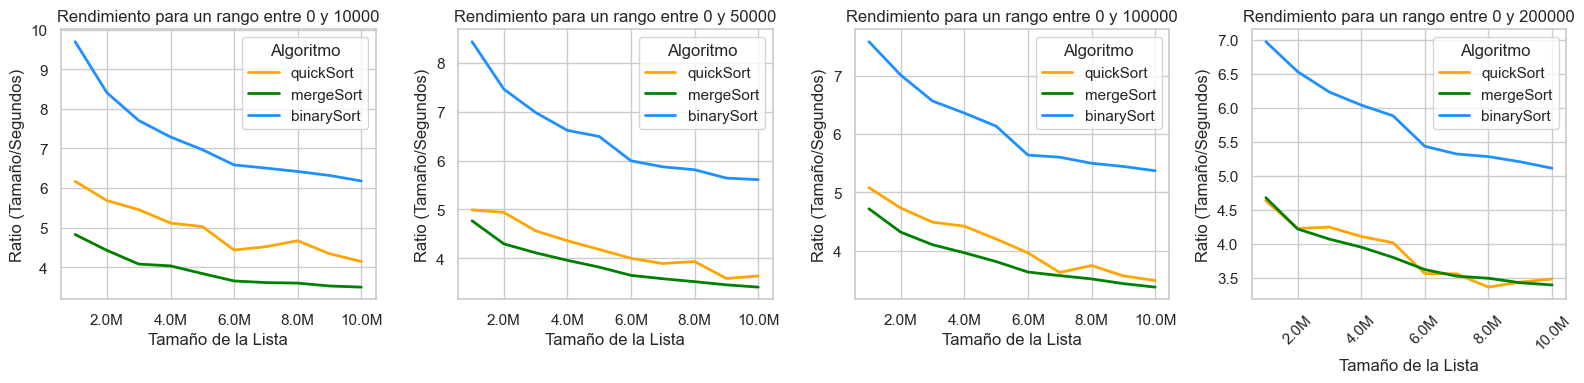

In [52]:
plot_distributions(df, 'normal', 'ratio')

#### 1.2. Tiempo en segundos que le tomo ordenar la lista

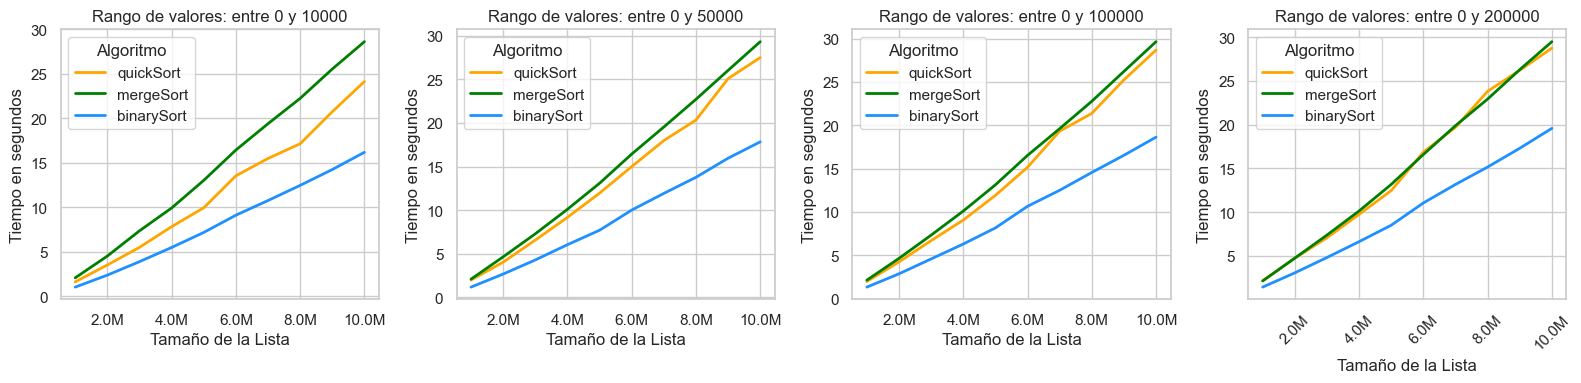

In [53]:
plot_distributions(df, 'normal')

#### 2. Distribucion Uniforme
<img src="uniforme.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

#### 2.1. Cuantos N(100.000X) puede ordenar por segundo

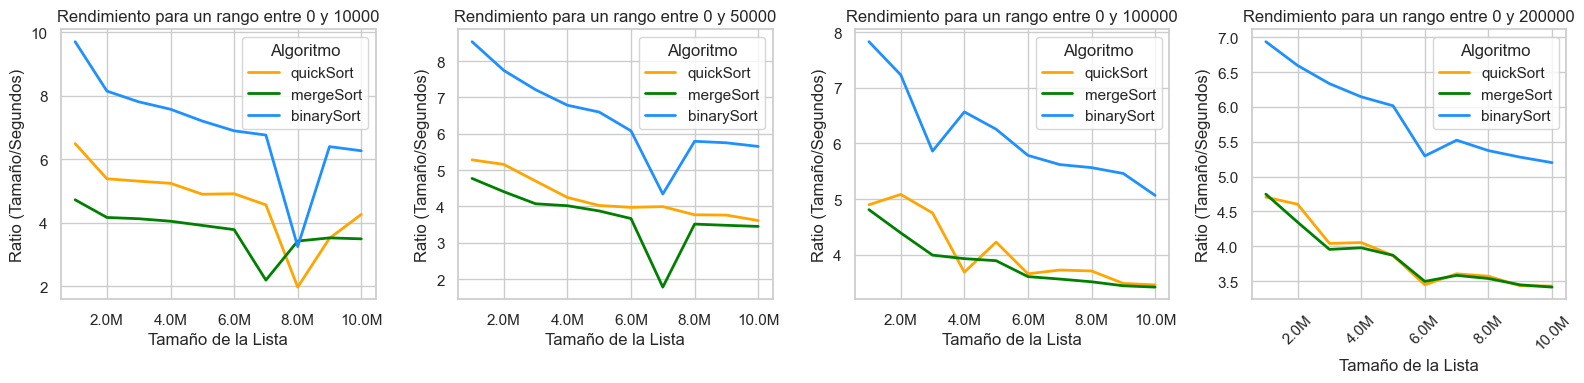

In [54]:
plot_distributions(df, 'uniform', 'ratio')

#### 2.2. Tiempo en segundos que le tomo ordenar la lista

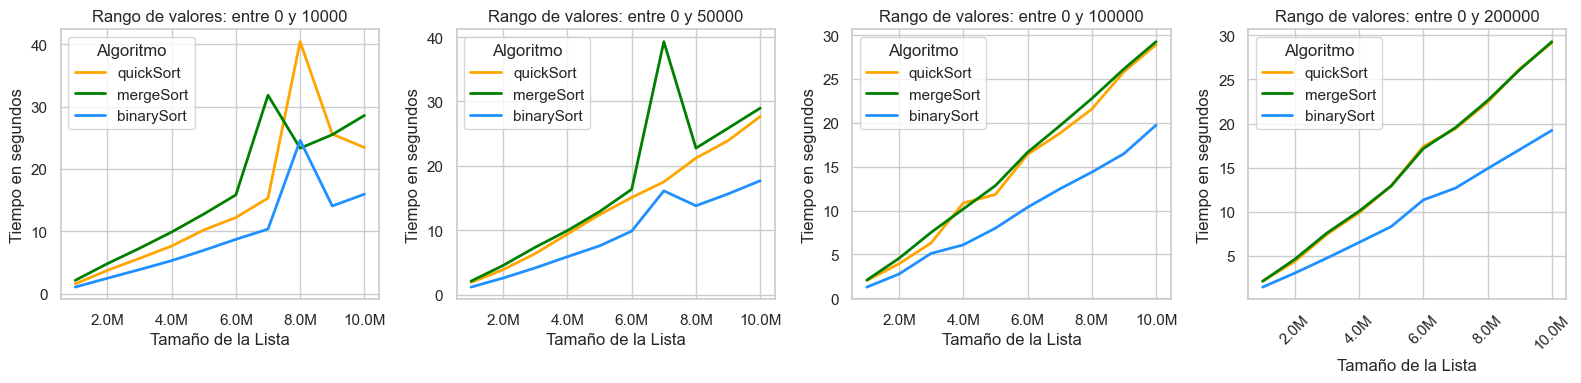

In [55]:
plot_distributions(df, 'uniform')

#### 3. Distribucion Bimodal
<img src="bimodal.PNG" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

#### 3.1. Cuantos N(100.000X) puede ordenar por segundo

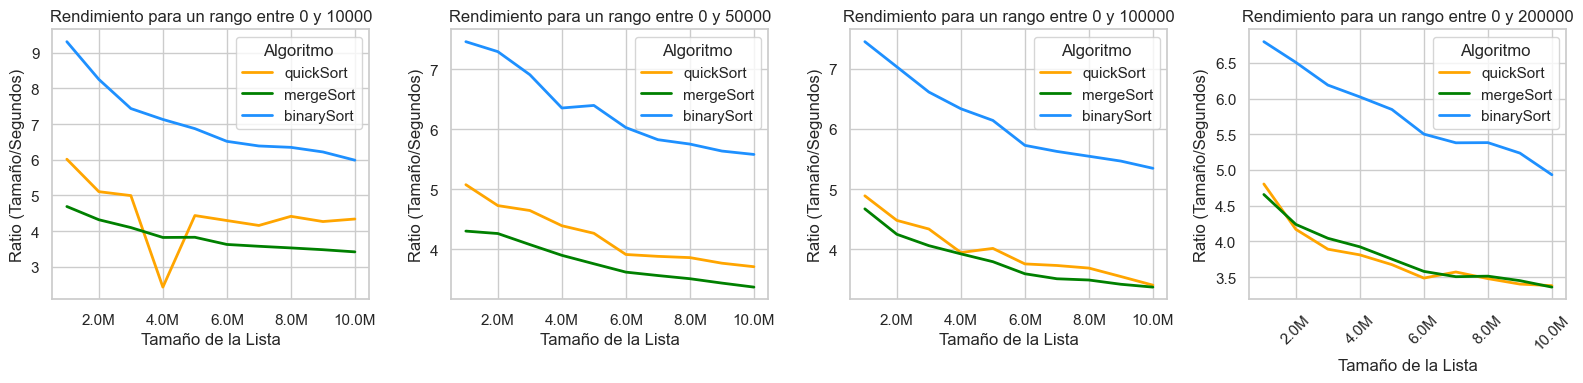

In [56]:
plot_distributions(df, 'bimodal', 'ratio')

#### 3.2. Tiempo en segundos que le tomo ordenar la lista

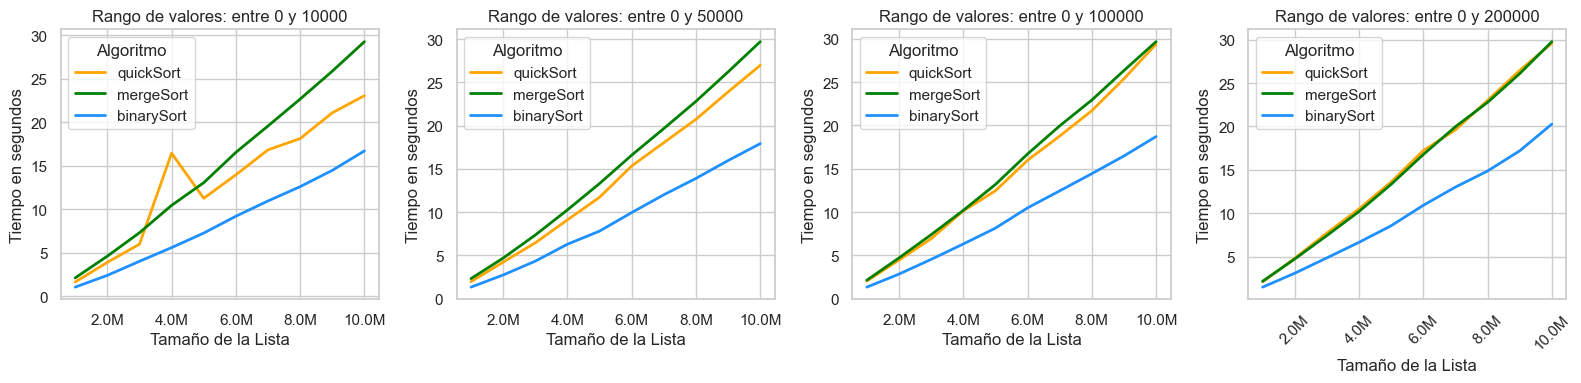

In [57]:
plot_distributions(df, 'bimodal')

#### 4. Distribucion Sesgada a la derecha
<img src="right.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

#### 4.1. Cuantos N(100.000X) puede ordenar por segundo

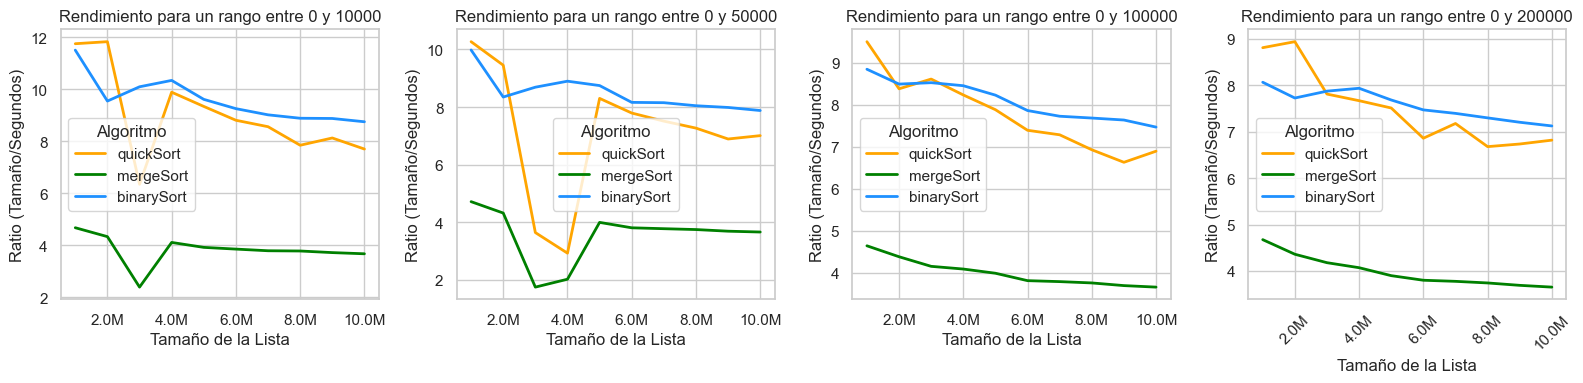

In [58]:
plot_distributions(df, 'right_skewed', 'ratio')

#### 4.2. Tiempo en segundos que le tomo ordenar la lista

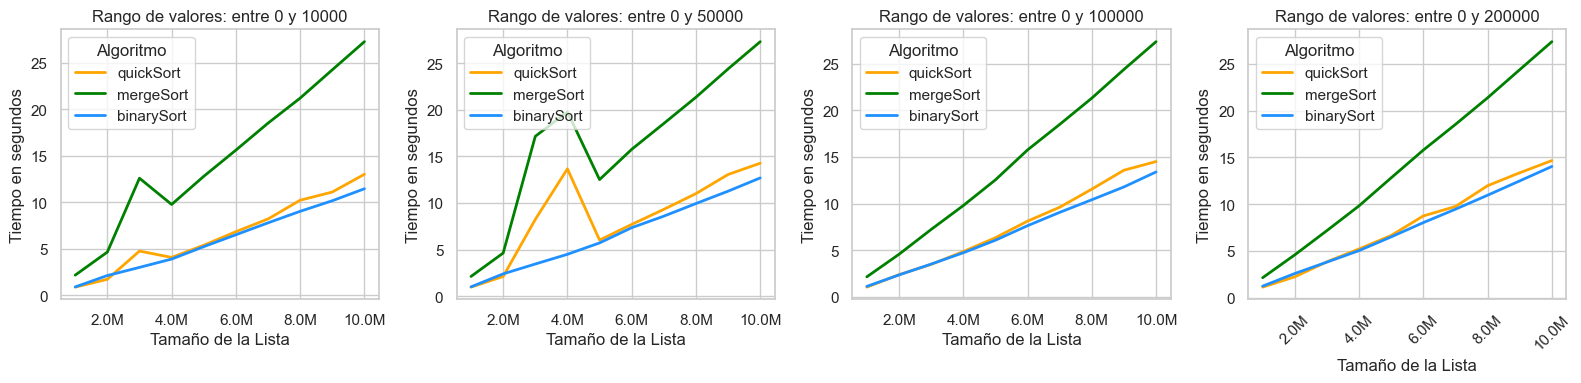

In [59]:
plot_distributions(df, 'right_skewed')

#### 5. Distribucion Sesgada a la izquierda
<img src="left.png" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

#### 5.1. Cuantos N(100.000X) puede ordenar por segundo

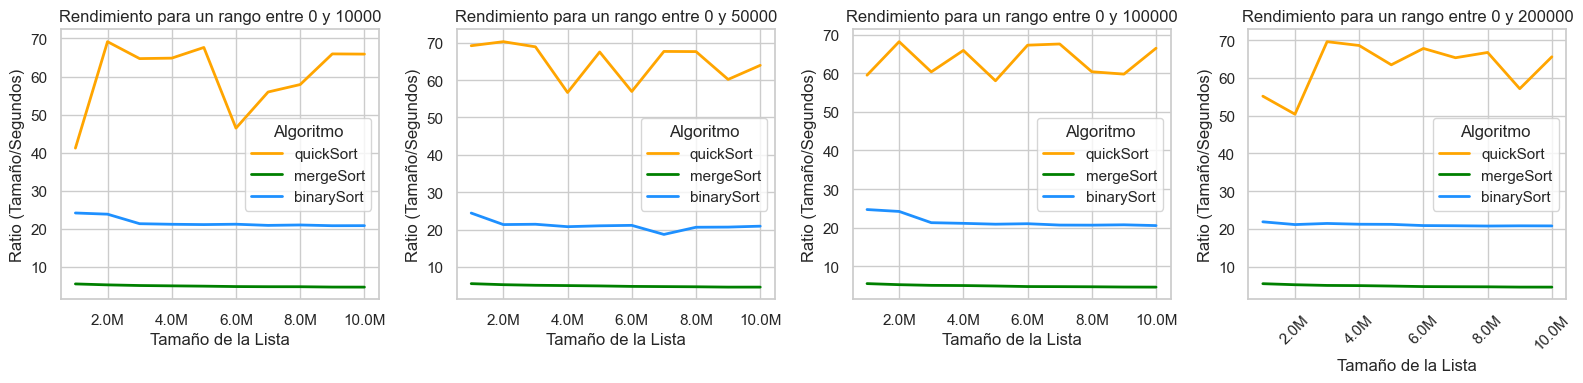

In [60]:
plot_distributions(df, 'left_skewed', 'ratio')

#### 5.2. Tiempo en segundos que le tomo ordenar la lista

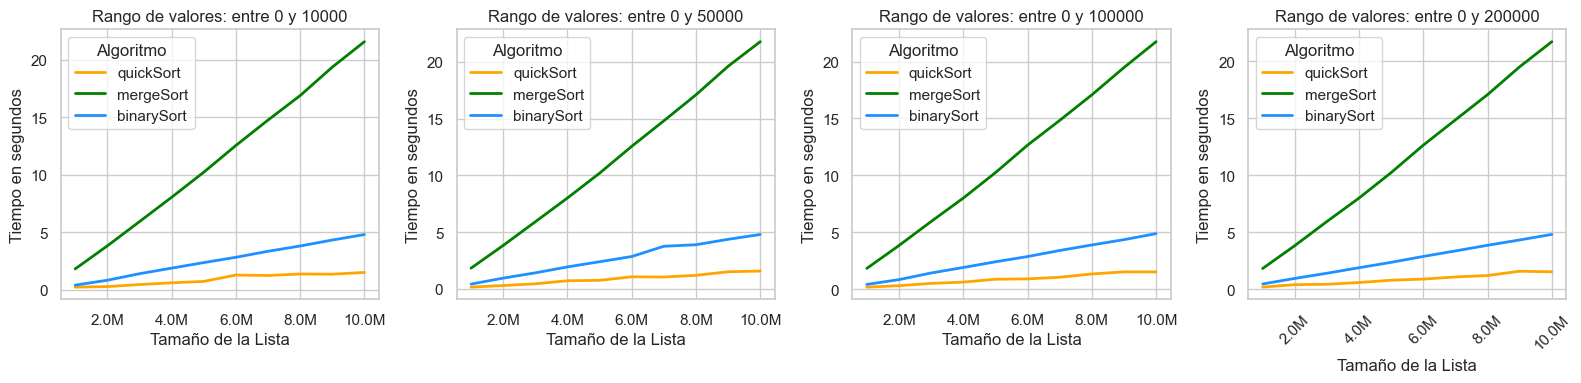

In [61]:
plot_distributions(df, 'left_skewed')

#### 6. Lista de numeros con el 70% de sus valores en 0
<img src="zeros.jpg" alt="Descripción de la imagen" width="200"  style="border-radius: 15px;"/>

#### 6.1. Cuantos N(100.000X) puede ordenar por segundo

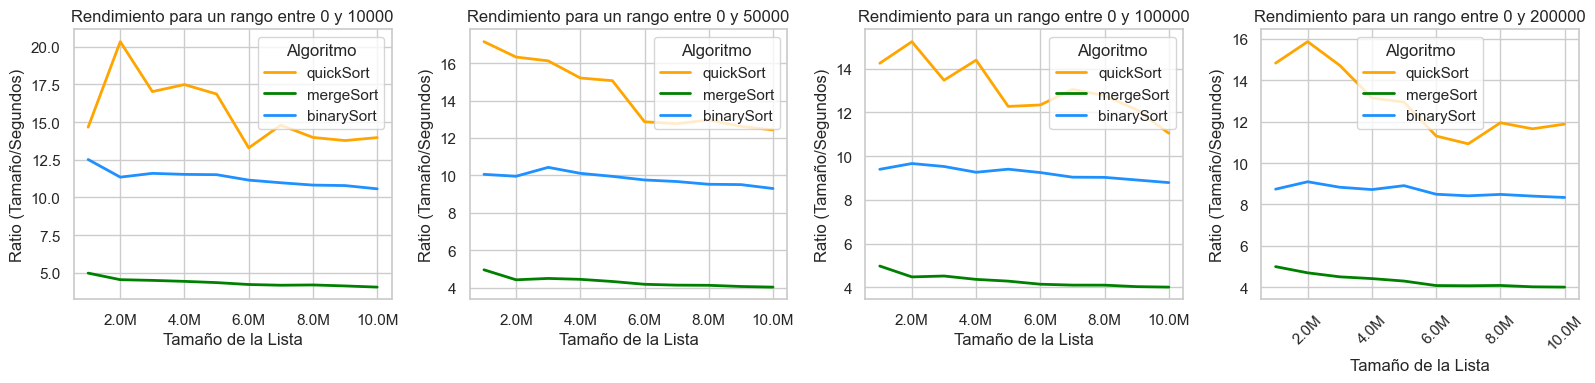

In [62]:
plot_distributions(df, 'zeros', 'ratio')

### 6.2. Tiempo en segundos que le tomo ordenar la lista

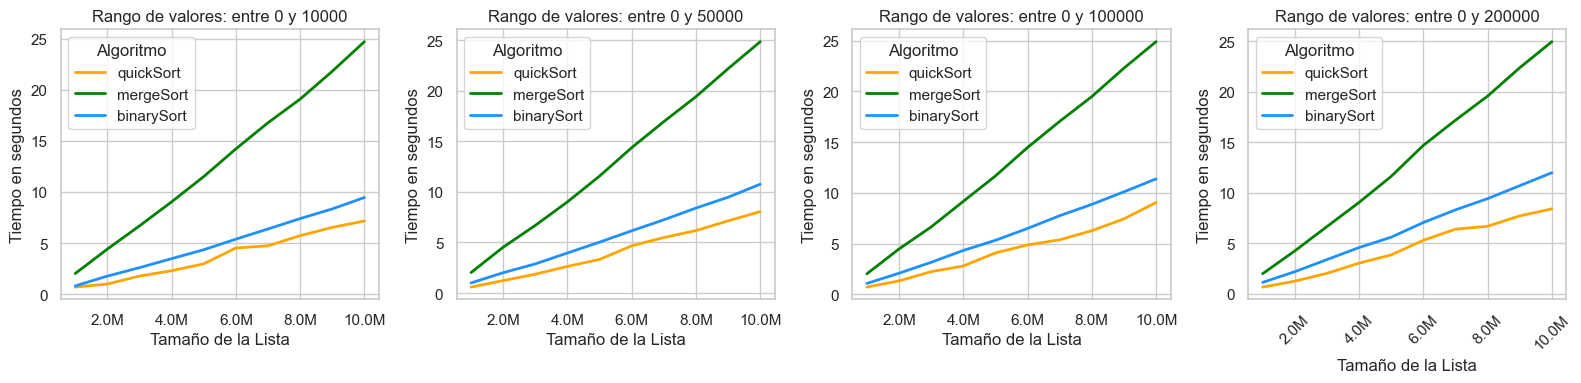

In [63]:
plot_distributions(df, 'zeros')

### Mapa de calor donde visualmente percibimos los puntos de mayor estres para los algoritmos

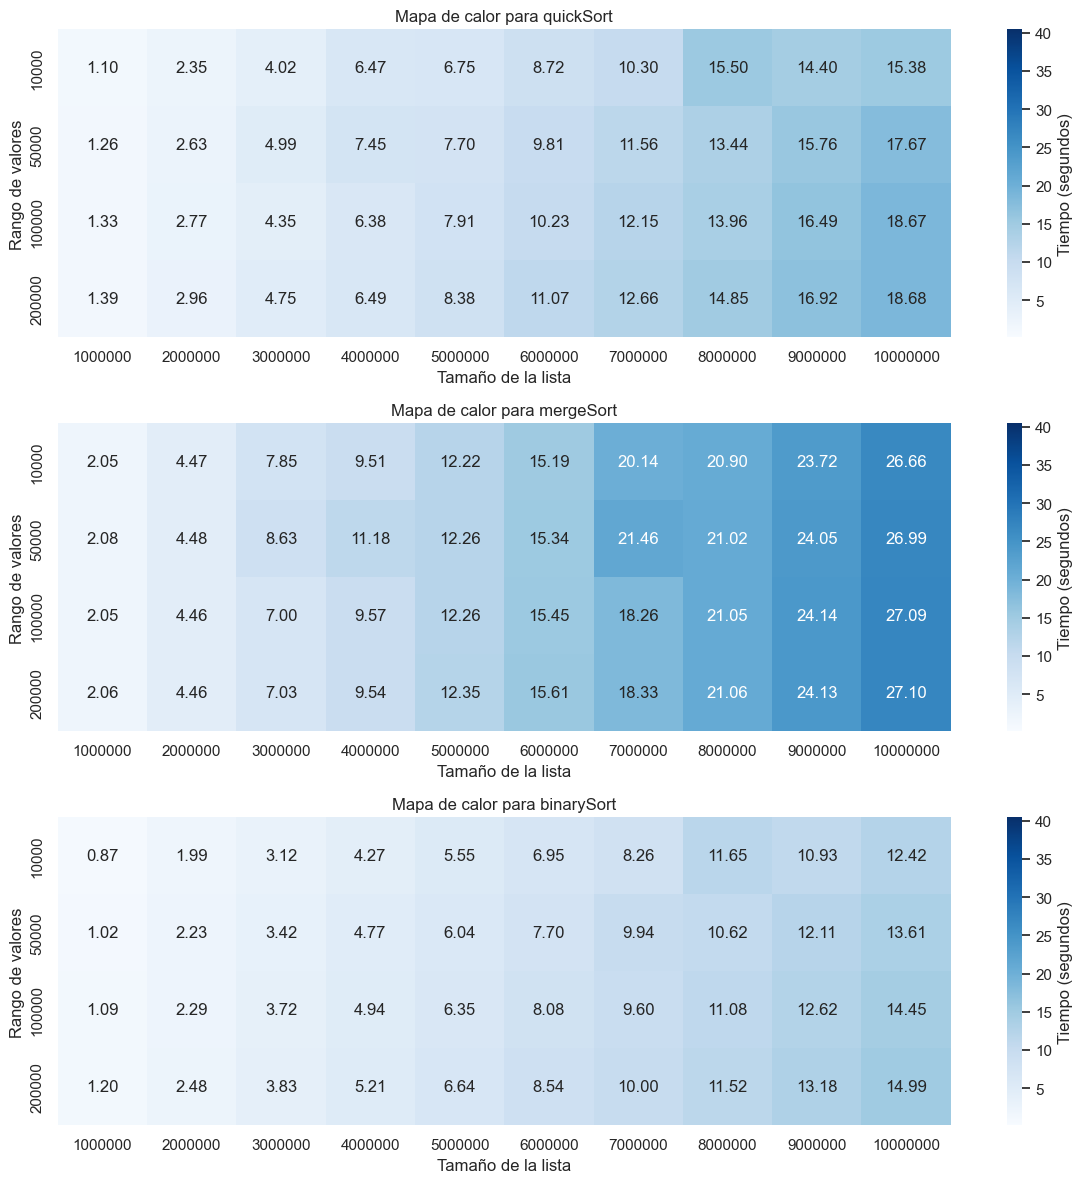

In [64]:

sns.set(style="whitegrid")


vmin = df['time'].min()
vmax = df['time'].max()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))


methods = df['method'].unique()

axes = axes.flatten()

for i, method in enumerate(methods):
    df_method = df[df['method'] == method]
    
    pivot_table = df_method.pivot_table(index="range", columns="size", values="time")
    
    sns.heatmap(pivot_table, ax=axes[i], annot=True, fmt=".2f", cmap="Blues", vmin=vmin, vmax=vmax,  cbar_kws={'label': 'Tiempo (segundos)'} )
    axes[i].set_title(f"Mapa de calor para {method}")
    axes[i].set_xlabel("Tamaño de la lista")
    axes[i].set_ylabel("Rango de valores")

plt.tight_layout()
plt.show()


### Grafico de barras donde compararemos los 3 algoritmos

In [65]:
ranges = df["range"].unique()
distributions = df["distribution"].unique()
sizes = df["size"].unique()
quickSort = 0
mergeSort = 0
binarySort = 0

for ran in ranges:
    for dist in distributions:
        for si in sizes:
            temp = df[(df["range"] == ran) & (df["distribution"] == dist) & (df["size"] == si )]

            if temp.iloc[0]["time"] < temp.iloc[1]["time"] and temp.iloc[0]["time"] < temp.iloc[2]["time"]:
                method_with_min_time = temp.iloc[0]["method"]

            elif temp.iloc[1]["time"] < temp.iloc[0]["time"] and temp.iloc[1]["time"] < temp.iloc[2]["time"]:
                method_with_min_time =temp.iloc[1]["method"]

            elif temp.iloc[2]["time"] < temp.iloc[1]["time"] and temp.iloc[2]["time"] < temp.iloc[0]["time"] :
                method_with_min_time =temp.iloc[2]["method"]


            
            if method_with_min_time == 'quickSort':
                quickSort += 1
            if method_with_min_time == 'mergeSort':
                mergeSort += 1
            if method_with_min_time == 'binarySort':
                binarySort += 1


methods = [ 'binarySort', 'mergeSort', 'quickSort' ]
times = [binarySort, mergeSort, quickSort ] 

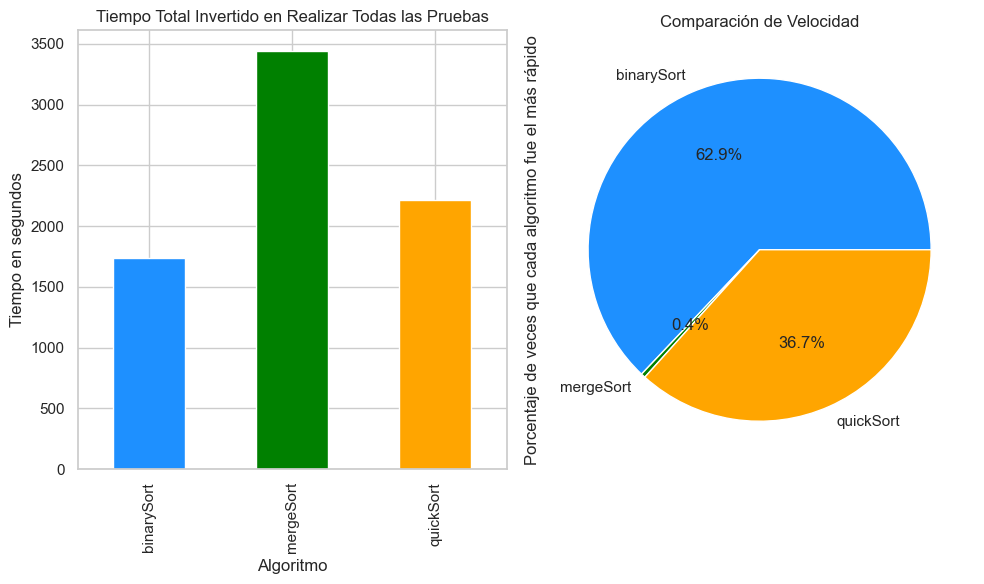

In [66]:

fastest_method_counts = pd.Series(times, index=methods)
total_time_per_method = df.groupby('method')['time'].sum()


fig, axes = plt.subplots(1, 2, figsize=(10, 6))  


total_time_per_method.plot(kind='bar', color=colors, ax=axes[0], title='Tiempo Total Invertido en Realizar Todas las Pruebas')
axes[0].set_xlabel('Algoritmo')
axes[0].set_ylabel('Tiempo en segundos')


fastest_method_counts.plot.pie( ax=axes[1],autopct='%1.1f%%', colors=colors,  title='Comparación de Velocidad')
axes[1].set_ylabel('Porcentaje de veces que cada algoritmo fue el más rápido')

plt.tight_layout()

plt.show()

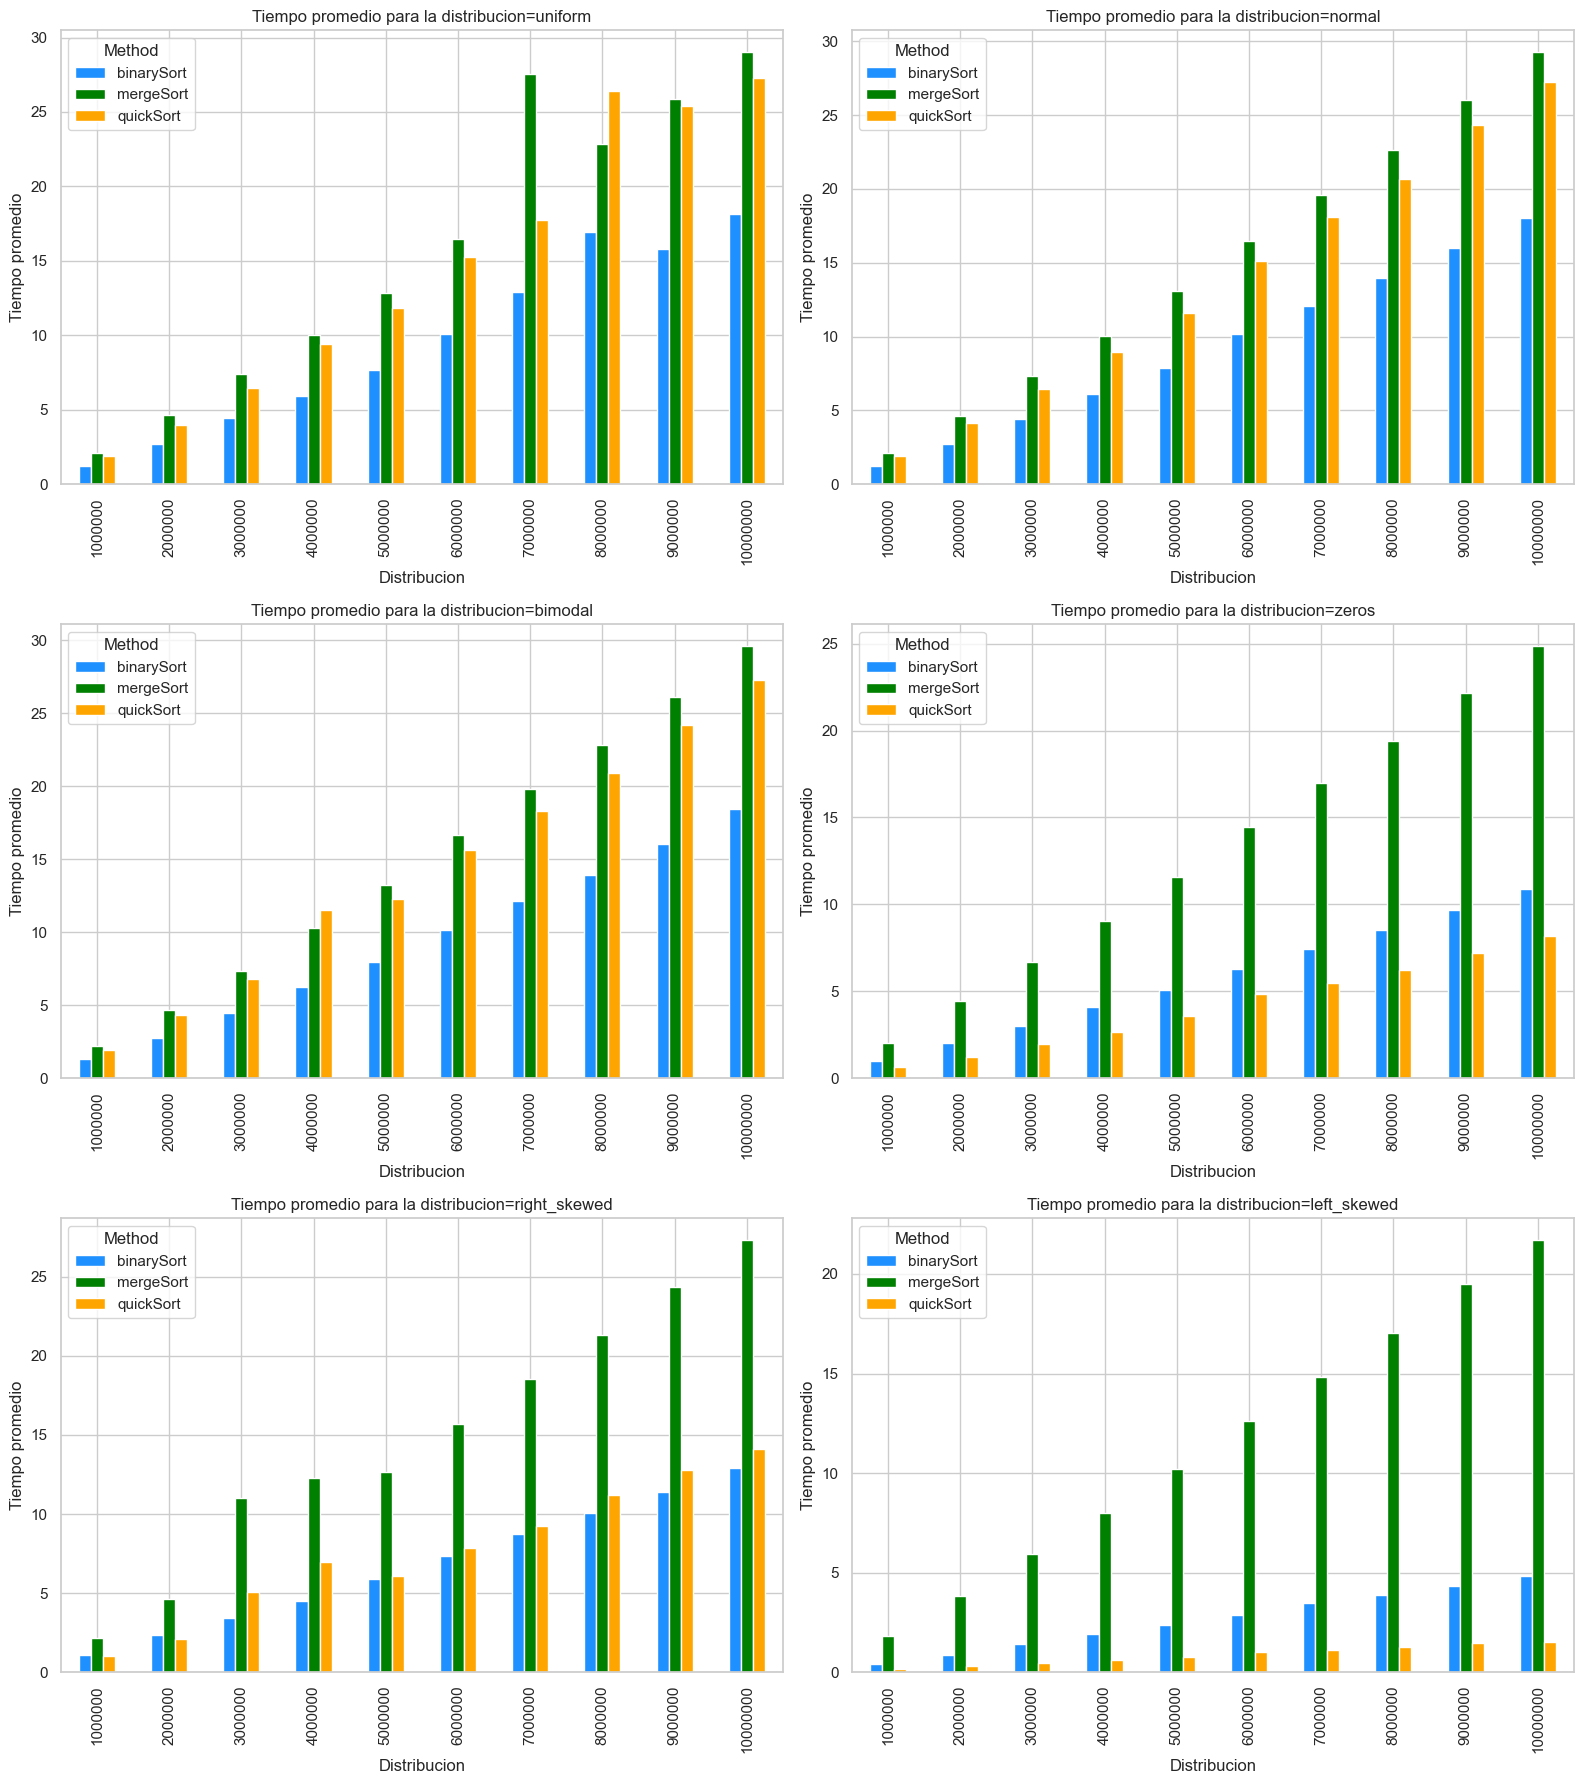

In [67]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

for i, dissss in enumerate(['uniform', 'normal', 'bimodal', 'zeros', 'right_skewed', 'left_skewed']):
    row = i // 2
    col = i % 2
    df_filtered = df[df['distribution'] == dissss]
    df_pivot = df_filtered.pivot_table(index='size', columns='method', values='time', aggfunc='mean')
    df_pivot.plot(kind='bar', color=colors, ax=axes[row, col])
    axes[row, col].set_ylabel('Tiempo promedio')
    axes[row, col].set_xlabel('Distribucion')
    axes[row, col].set_title(f'Tiempo promedio para la distribucion={dissss}')
    axes[row, col].legend(title='Method', loc='upper left')

plt.tight_layout()
plt.show()

### Los resultados preliminares sugieren que el algoritmo de ordenamiento binario demuestra un comportamiento eficiente en al menos el 76% de las ocasiones

### Las pruebas se realizaron en mi laptop personal con un procesador i7. En caso de necesitar pruebas más exhaustivas, planeo alquilar instancias de Amazon para manejar una mayor cantidad de datos